In [ ]:
import pandas as pd
import numpy as np
 
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
 
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
 
from sklearn import metrics

In [ ]:
from google.colab import drive
 
drive.mount('/content/gdrive')

## loading the data

In [ ]:
# data=pd.read_csv("/content/gdrive/MyDrive/Untitled form (File responses)/train_s3TEQDk.csv")
# data.head()
# train=pd.read_csv("/content/gdrive/MyDrive/Untitled form (File responses)/train_s3TEQDk.csv")

# test =  pd.read_csv('../input/jobathon-may-2021-credit-card-lead-prediction/test.csv')
data = pd.read_csv( '../input/jobathon-may-2021-credit-card-lead-prediction/train.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


## checking its data types

In [ ]:
data.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

## here labelencoder is used to transform non-numerical labels to numerical labels.

In [ ]:
train['Credit_Product']=train['Credit_Product'].astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
# df=data.copy()
# lab=LabelEncoder()
# df["Gender"]=lab.fit_transform(data["Gender"])
# df["Occupation"]=lab.fit_transform(data["Occupation"])
# df["Credit_Product"]=lab.fit_transform(data["Credit_Product"])
# df["Is_Active"]=lab.fit_transform(data["Is_Active"])
# df["Channel_Code"]=lab.fit_transform(data["Channel_Code"])

# df.head()

In [ ]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
 
train['Gender']= le.fit_transform(train['Gender'])
train['Occupation']= le.fit_transform(train['Occupation'])
train['Credit_Product']= le.fit_transform(train['Credit_Product'])
train['Vintage']= le.fit_transform(train['Vintage'])
train['Region_Code']= le.fit_transform(train['Region_Code'])
train['Channel_Code']= le.fit_transform(train['Channel_Code'])
train['Age']= le.fit_transform(train['Age'])
train['Is_Lead']= le.fit_transform(train['Is_Lead'])
train['Is_Active']= le.fit_transform(train['Is_Active'])
train['ID']= le.fit_transform(train['ID'])

In [ ]:
target=train.iloc[:,10:]
input=train.iloc[:,0:10]
target,input

(        Is_Lead
 0             0
 1             0
 2             0
 3             0
 4             0
 ...         ...
 245720        0
 245721        0
 245722        0
 245723        0
 245724        0
 
 [245725 rows x 1 columns],
             ID  Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
 0       179194       0   50           18           1             2       18   
 1       131013       0    7           27           2             0       13   
 2       121520       0   33           18           3             2       10   
 3        57273       1   11           20           2             0        6   
 4       209602       0    7           32           2             0       14   
 ...        ...     ...  ...          ...         ...           ...      ...   
 245720   60529       1   28           34           3             2       51   
 245721  122463       1    4           18           2             0        5   
 245722  111270       0    3           31     

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [ ]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [ ]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

0    187437
1     58288
Name: Is_Lead, dtype: int64


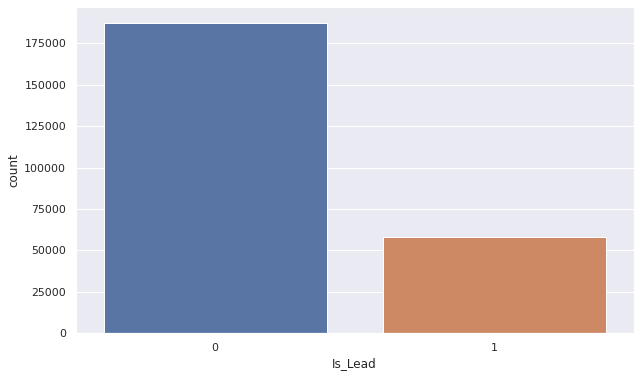

In [ ]:
target = 'Is_Lead'
df1=train.copy()
X = df1.loc[:, df1.columns!=target]
Y = df1.loc[:, df1.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)
ax = sns.countplot(x=df1.Is_Lead, data=df1)
print(df1[target].value_counts())

## at first i used xgboost


In [ ]:
import xgboost as xg
from xgboost import XGBClassifier
 
clf2 = xg.XGBClassifier(class_weight='balanced').fit(X_train, Y_train)

[07:36:25] WARNING: ../src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:36:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
clf2 = xg.XGBClassifier(class_weight='balanced').fit(X_train, Y_train)

[07:36:35] WARNING: ../src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:36:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
from sklearn.utils import class_weight
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target])

array([0.65555069, 2.10719314])

In [ ]:
 
Y_Test_Pred = clf2.predict(X_test)

In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8587988654581329
Precision =  0.7877396905308358
Recall =  0.5535036154606461
F1 Score =  0.6501680415520928


## ROC SCORE WAS 0.87

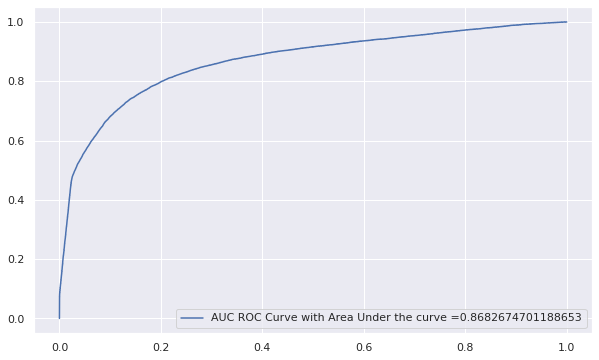

In [ ]:
generate_auc_roc_curve(clf2, X_test)

In [ ]:
from joblib import dump, load
dump(clf2, 'extra1.joblib')

['extra1.joblib']

In [ ]:
# test=pd.read_csv("/content/gdrive/MyDrive/Untitled form (File responses)/test_mSzZ8RL.csv")
test =  pd.read_csv('../input/jobathon-may-2021-credit-card-lead-prediction/test.csv')
# train = pd.read_csv( '../input/jobathon-may-2021-credit-card-lead-prediction/train.csv')
 
test['Credit_Product']=test['Credit_Product'].astype(str)
df=test.copy()
lab=LabelEncoder()
df["Gender"]=lab.fit_transform(test["Gender"])
df["Occupation"]=lab.fit_transform(test["Occupation"])
df["Credit_Product"]=lab.fit_transform(test["Credit_Product"])
df["Is_Active"]=lab.fit_transform(test["Is_Active"])
df["Channel_Code"]=lab.fit_transform(test["Channel_Code"])
df["ID"]=lab.fit_transform(test["ID"])
df["Age"]=lab.fit_transform(test["Age"])
df["Region_Code"]=lab.fit_transform(test["Region_Code"])
df["Vintage"]=lab.fit_transform(test["Vintage"])
df["Avg_Account_Balance"]=lab.fit_transform(test["Avg_Account_Balance"])
df.head()
# target1=df.iloc[:,10:]
input1=df[0:]
input1

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,94233,1,5,4,1,0,9,1,27635,0
1,28747,1,19,18,1,1,21,2,37999,0
2,94883,1,7,20,2,0,4,0,732,0
3,90941,1,5,22,1,0,14,0,34903,0
4,87803,0,5,20,1,0,6,0,22312,0
...,...,...,...,...,...,...,...,...,...,...
105307,33196,1,28,18,2,1,40,1,77048,1
105308,31821,1,31,27,1,1,40,1,48831,0
105309,52132,1,11,4,2,3,5,0,63962,0
105310,1477,1,29,4,1,2,44,0,27329,1


In [ ]:
pre=load("extra1.joblib")
predicted=pre.predict(input1)
ff=pd.DataFrame({"ID":input1["ID"],
                 "Is_Lead"
                 :predicted})
ff.to_csv ('dataframe.csv', index = None, header=True) 

## SECOND ATTEMPT


In [ ]:
minority_class_len = len(train[train[target] == 1])
print(minority_class_len)

majority_class_indices = train[train[target] == 0].index
print(majority_class_indices)

58288
Int64Index([     0,      1,      2,      3,      4,      5,      7,      8,
                 9,     10,
            ...
            245715, 245716, 245717, 245718, 245719, 245720, 245721, 245722,
            245723, 245724],
           dtype='int64', length=187437)


In [ ]:

random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))
minority_class_indices = train[train[target] == 1].index
print(minority_class_indices)

58288
Int64Index([     6,     15,     16,     17,     20,     29,     31,     34,
                36,     37,
            ...
            245683, 245684, 245690, 245693, 245694, 245697, 245699, 245709,
            245713, 245714],
           dtype='int64', length=58288)


<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

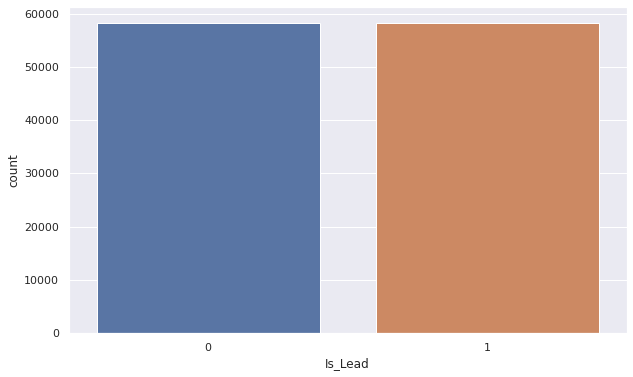

In [ ]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
under_sample = train.loc[under_sample_indices]
sns.countplot(x=target, data=under_sample)

In [ ]:
from sklearn.naive_bayes import GaussianNB 

X = under_sample.loc[:, train.columns!=target]
Y = under_sample.loc[:, train.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

## THIS TIME I USED CATBOOST


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn import linear_model
from catboost import CatBoostRegressor
params = {'n_estimators':10000, 'learning_rate': 0.1, 'eval_metric':'RMSE', 'loss_function':'RMSE', 'task_type':'GPU', 'devices':'0:1', 'random_state':42}
model = CatBoostRegressor(**params)
model.fit(X,Y,verbose=1000)
predictions_catboost = model.predict(input1)

In [ ]:
from joblib import dump, load
dump(model, 'extra7.joblib') 

In [ ]:
test=pd.read_csv("/content/gdrive/MyDrive/Untitled form (File responses)/test_mSzZ8RL.csv")

In [ ]:

 
test['Credit_Product']=test['Credit_Product'].astype(str)
df=test.copy()
lab=LabelEncoder()
df["Gender"]=lab.fit_transform(test["Gender"])
df["Occupation"]=lab.fit_transform(test["Occupation"])
df["Credit_Product"]=lab.fit_transform(test["Credit_Product"])
df["Is_Active"]=lab.fit_transform(test["Is_Active"])
df["Channel_Code"]=lab.fit_transform(test["Channel_Code"])
df["ID"]=lab.fit_transform(test["ID"])
df["Age"]=lab.fit_transform(test["Age"])
df["Region_Code"]=lab.fit_transform(test["Region_Code"])
df["Vintage"]=lab.fit_transform(test["Vintage"])
df["Avg_Account_Balance"]=lab.fit_transform(test["Avg_Account_Balance"])
df.head()

In [ ]:
# target1=df.iloc[:,10:]
input1=df.iloc[:,0:]
input1

In [ ]:
pre=load("extra7.joblib")
predicted=pre.predict(input1)
ff=pd.DataFrame({"ID":test["ID"],
                 "Is_Lead"
                 :predicted})

ff.to_csv("extra77.csv")

##FINAL ATTEMPT I USED EXTRA TREE CLASSIFIER MODEL

In [ ]:
X = under_sample.loc[:, train.columns!=target]
Y = under_sample.loc[:, train.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = ExtraTreesClassifier().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)


In [ ]:
clf = ExtraTreesClassifier().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [ ]:

generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8523245776297941
Precision =  0.7514920194309507
Recall =  0.5633355875773812
F1 Score =  0.643950881574644


## I GOT ROC SCORE 0.85

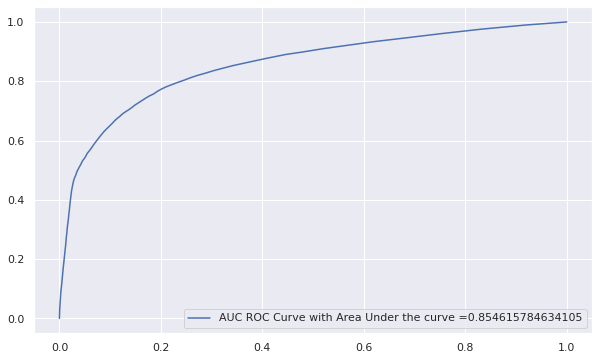

In [ ]:
generate_auc_roc_curve(clf, X_test)

In [ ]:
from joblib import dump, load
dump(clf1, 'extra7.joblib') 

In [ ]:
pre=load("extra7.joblib")
predicted=pre.predict(input1)
ff=pd.DataFrame({"ID":test["ID"],
                 "Is_Lead"
                 :predicted})

ff.to_csv("extra77.csv")